In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [3]:
df.drop(['Lat','Long'],axis=1,inplace=True)

In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.head()

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,2020-01-22,0,0,0
1,NaN,Albania,2020-01-22,0,0,0
2,NaN,Algeria,2020-01-22,0,0,0
3,NaN,Andorra,2020-01-22,0,0,0
4,NaN,Angola,2020-01-22,0,0,0


In [6]:
byCountry=df.groupby(['Country/Region','Date']).sum().sort_values(by=['Country/Region','Date'])
byCountry.head()

Confirmed  Deaths  Recovered
Country/Region Date                                    
Afghanistan    2020-01-22          0       0          0
               2020-01-23          0       0          0
               2020-01-24          0       0          0
               2020-01-25          0       0          0
               2020-01-26          0       0          0

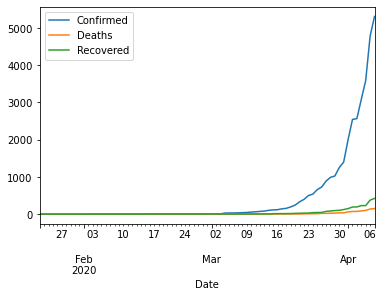

In [7]:
byCountry.xs(level='Country/Region',key='India').plot()

In [8]:
byCountry['Mortality_rate']=byCountry['Deaths']/byCountry['Confirmed']
byCountry['Recovery_rate']=byCountry['Recovered']/byCountry['Confirmed']
byCountry.head()

Confirmed  Deaths  Recovered  Mortality_rate  \
Country/Region Date                                                       
Afghanistan    2020-01-22          0       0          0             NaN   
               2020-01-23          0       0          0             NaN   
               2020-01-24          0       0          0             NaN   
               2020-01-25          0       0          0             NaN   
               2020-01-26          0       0          0             NaN   

                           Recovery_rate  
Country/Region Date                       
Afghanistan    2020-01-22            NaN  
               2020-01-23            NaN  
               2020-01-24            NaN  
               2020-01-25            NaN  
               2020-01-26            NaN

India
Note: Multiple entries mus be seperated with comma(,)
1.Confirmed
2.Deaths
3.Recovered
4.Mortality rate
5.Recovery Rate
:-->
1,2,3


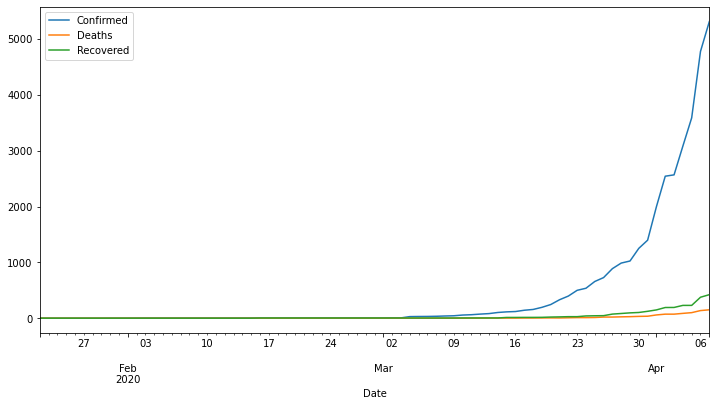

In [9]:
def display(ct,ch):
    choice=[]
    if(1 in ch):
        choice.append('Confirmed')
    if(2 in ch):
        choice.append('Deaths')
    if(3 in ch):
        choice.append('Recovered')
    if(4 in ch):
        choice.append('Mortality_rate')
    if(5 in ch):
        choice.append('Recovery_rate')
    if(choice==[]):
        print('Invalid Input!')
    byCountry.xs(level='Country/Region',key=ct)[choice].plot(figsize=(12,6))
country=input()
while(country not in np.array(df['Country/Region'])):
      country=input()
print('Note: Multiple entries mus be seperated with comma(,)\n1.Confirmed\n2.Deaths\n3.Recovered\n4.Mortality rate\n5.Recovery Rate\n:-->')
choice=list(map(int,input().split(',')))
display(country,choice)

In [13]:
df['Day_no']=df['Date'].apply(lambda x:int(str(x-np.datetime64('2020-01-21')).split()[0]))

In [14]:
df.head()

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Day_no
0,NaN,Afghanistan,2020-01-22,0,0,0,1
1,NaN,Albania,2020-01-22,0,0,0,1
2,NaN,Algeria,2020-01-22,0,0,0,1
3,NaN,Andorra,2020-01-22,0,0,0,1
4,NaN,Angola,2020-01-22,0,0,0,1


In [15]:
data=df.groupby(['Country/Region','Date','Day_no']).sum().reset_index('Day_no')

In [16]:
data.xs('India')['Day_no']

Date
2020-01-22     1
2020-01-23     2
2020-01-24     3
2020-01-25     4
2020-01-26     5
              ..
2020-04-03    73
2020-04-04    74
2020-04-05    75
2020-04-06    76
2020-04-07    77
Name: Day_no, Length: 77, dtype: int64

In [17]:
data.head()

Day_no  Confirmed  Deaths  Recovered
Country/Region Date                                            
Afghanistan    2020-01-22       1          0       0          0
               2020-01-23       2          0       0          0
               2020-01-24       3          0       0          0
               2020-01-25       4          0       0          0
               2020-01-26       5          0       0          0

# Predictor Training of India


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
#India=data.xs('India')[data.xs('India')['Confirmed']>0]

In [54]:
X_poly=PolynomialFeatures(degree=5).fit_transform(np.array(data.xs('India')['Day_no']).reshape(-1,1))

In [55]:
lm=LinearRegression()

In [56]:
lm.fit(X_poly,data.xs('India')['Confirmed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
pred=lm.predict(X_poly)

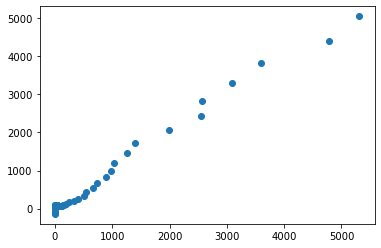

In [58]:
plt.scatter(data.xs('India')['Confirmed'],pred)

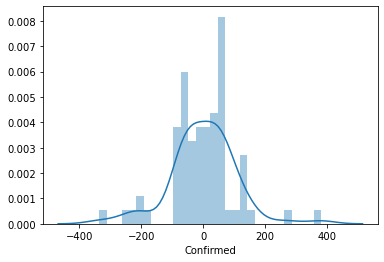

In [59]:
sns.distplot(data.xs('India')['Confirmed']-pred,bins=30)

In [60]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(data.xs('India')['Confirmed'],pred))
r2 = r2_score(data.xs('India')['Confirmed'],pred)
print(rmse)
print(r2)

105.83524163870425
0.9896777756553528


In [61]:
n=int(input())
n_poly=PolynomialFeatures(5).fit_transform(np.array([n]).reshape(-1,1))
print('No of Confimed Cases(Predicted) :',int(lm.predict(n_poly)[0]))
if(n<78):
    print(data.xs('India')[data.xs('India')['Day_no']==n]['Confirmed'])

87
No of Confimed Cases(Predicted) : 16448


numpy.timedelta64(87,'D')

# World level Predictor


India
Enter the Day Number:71
Root Mead Square Evaluation: 75.04958784405682
R2 score of designed model: 0.9948094986836498
Prediction: 2310
Date
2020-04-02    2543
Name: Confirmed, dtype: int64


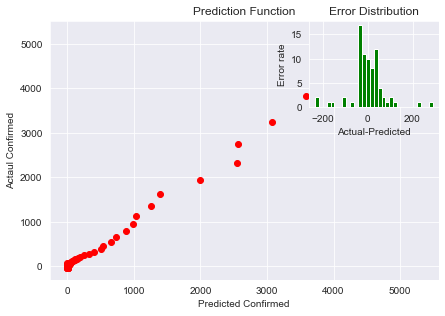

In [49]:
def predictor(country,day):
    X_poly=PolynomialFeatures(6).fit_transform(np.array(data.xs(country)['Day_no']).reshape(-1,1))
    n_poly=PolynomialFeatures(6).fit_transform(np.array([day]).reshape(-1,1))
    lm=LinearRegression()
    lm.fit(X_poly,data.xs(country)['Confirmed'])
    pred=lm.predict(X_poly)
    
    
    sns.set_style('darkgrid')
    fig=plt.figure()
    
    ax1=fig.add_axes([0.1,0.1,0.9,0.9])
    ax1.set_title('Prediction Function')
    ax1.set_xlabel('Predicted Confirmed')
    ax1.set_ylabel('Actaul Confirmed')
    ax1.scatter(data.xs(country)['Confirmed'],pred,color='red')
    
    ax2=fig.add_axes([0.7,0.7,0.3,0.3])
    ax2.set_title('Error Distribution')
    ax2.set_xlabel('Actual-Predicted')
    ax2.set_ylabel('Error rate')
    ax2.hist(data.xs(country)['Confirmed']-pred,color='green',bins=30)
    
    
    rmse = np.sqrt(mean_squared_error(data.xs(country)['Confirmed'],pred))
    r2 = r2_score(data.xs(country)['Confirmed'],pred)
    print('Root Mead Square Evaluation:',rmse)
    print('R2 score of designed model:',r2)
    
    print('Prediction:',int(lm.predict(n_poly)[0]))
    if(day<78):
        print(data.xs(country)[data.xs(country)['Day_no']==day]['Confirmed'])
    
    
    
country=input()
while(country not in np.array(df['Country/Region'])):
      country=input()
n=int(input('Enter the Day Number:'))
predictor(country,n)